# Inho Kim - APM466 Assignment 1

### Question 4a - Calculating bonds' yield (ytm)

In [83]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from datetime import datetime
#import plotly.graph_objects as go


In [84]:
def calc_year_difference(date_start, date_end):
  date_start = datetime.strptime(date_start, '%Y-%m-%d').date()
  date_end = datetime.strptime(date_end, '%Y-%m-%d').date()
  difference = round((date_end - date_start).days / 360,3)
  return difference
#print(calc_year_difference('2024-01-08', '2024-03-01'))

In [85]:
# Bond data initialization
# Bond data here: https://docs.google.com/spreadsheets/d/1FUB_0FK3L6lj1kYwb8fMgKYZGpufswcEq31KiMqI5V8/edit?usp=sharing

bond_data_list = [['CA135087J546', 4.97, 2.25, '2018-10-05', '2024-03-01', 'CAN 2.25 Mar 1 2024', [99.63, 99.64, 99.65, 99.661, 99.67, 99.687, 99.68, 99.683, 99.708, 99.72]],
                  ['CA135087J967', 4.86, 1.50, '2019-05-04', '2024-09-01', 'CAN 1.50 Sep 1 2024', [97.96, 97.985, 97.982, 97.982, 98.021, 98.054, 97.974, 97.975, 97.999, 98.007]],
                  ['CA135087K528', 4.61, 1.25, '2019-11-10', '2025-03-01', 'CAN 1.25 Mar 1 2025', [96.46, 96.482, 96.552, 96.576, 96.661, 96.715, 96.54, 96.448, 96.495, 96.46]],
                  ['CA135087K940', 4.33, 0.50, '2020-03-04', '2025-09-01', 'CAN 0.50 Sep 1 2025', [94.34, 94.37, 94.38, 94.43, 94.49, 94.49, 94.42, 94.25, 94.24, 94.22]],
                  ['CA135087L518', 4.01, 0.25, '2020-09-10', '2026-03-01', 'CAN 0.25 Mar 1 2026', [92.862, 92.86, 92.844, 92.856, 93.023, 93.008, 92.796, 92.57, 92.546, 92.545]],
                  ['CA135087L930', 3.87, 1.00, '2021-04-16', '2026-09-01', 'CAN 1.00 Sep 1 2026', [93.46, 93.44, 93.55, 93.53, 93.6, 93.57, 93.4, 93.12, 93.08, 93.07]],
                  ['CA135087M847', 3.74, 1.25, '2021-10-15', '2027-03-01', 'CAN 1.25 Mar 1 2027', [93.282, 93.301, 93.245, 93.186, 93.467, 93.493, 93.141, 92.856, 92.753, 92.764]],
                  ['CA135087N837', 3.67, 2.75, '2022-05-13', '2027-09-01', 'CAN 2.75 Sep 1 2027', [97.58, 97.591, 97.603, 97.52, 97.74, 97.772, 97.441, 97.092, 96.956, 96.947]],
                  ['CA135087P576', 3.59, 3.50, '2022-10-21', '2028-03-01', 'CAN 3.50 Mar 1 2028', [100.5, 100.48, 100.439, 100.328, 100.637, 100.673, 100.22, 99.834, 99.662, 99.623]],
                  ['CA135087Q491', 3.53, 3.25, '2023-04-21', '2028-09-01', 'CAN 3.25 Sep 1 2028', [99.74, 99.72, 99.72, 99.55, 99.88, 99.91, 99.44, 98.99, 98.81, 98.77]]]
bonds_df = pd.DataFrame(bond_data_list, columns=['ISIN', 'Yield', 'Coupon', 'Issue_Date', "Maturity_Date", "Name", "Prices"])
measured_date_list = ['2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19']

bond_data_dates = []
for i in range(10):
    date_object = datetime.strptime(bond_data_list[i][4], '%Y-%m-%d')
    bond_data_date = date_object.strftime('%m/%y')
    bond_data_dates.append(bond_data_date)
bond_data_dates.append('03/29')

def bonds_list_function(index):
    bonds_list = []
    for i in range(10):
        bonds_list.append((bonds_df["Prices"][i][index], bonds_df["Coupon"][i], calc_year_difference(measured_date_list[i], bonds_df["Maturity_Date"][i])))
    return bonds_list

master_bonds_list = [] 
for i in range(10):
    master_bonds_list.append(bonds_list_function(i))

In [86]:
def calc_ytm(present_value, coupon_rate, years_to_maturity):
    face_value = 100
    coupon_payment = face_value * coupon_rate
    ytm = (coupon_payment + (face_value - present_value) / years_to_maturity) / ((face_value + present_value) / 2)
    ytm = round(ytm, 2) 
    return ytm

ytm_master = []
for i in range(10):
    ytm_list = []
    for j in range(10):
        ytm_list.append(calc_ytm(master_bonds_list[i][j][0], master_bonds_list[i][j][1], master_bonds_list[i][j][2]))
    ytm_master.append(ytm_list)

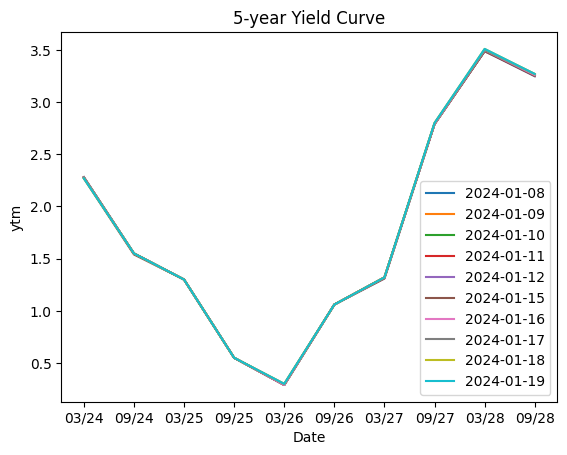

In [87]:
plt.xlabel('Date')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = bond_data_dates)
plt.ylabel('ytm')
plt.title('5-year Yield Curve')

for i in range(10):
    plt.plot(ytm_master[i], label = measured_date_list[i])

plt.legend()
plt.show()